In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

Задача состоит в том, чтобы исследовать набор данных, состоящий из фильмов и сериалов, выходивших на Нетфликс. Также
на основе обучающей и тестовой выборки исследуем, как через различные признаки можно определить
значение кассовых сборов, больших или меньших определённого уровня.

## 1. Загружаем данные

In [ ]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/Shilovski/ML/main/netflix_rotten_tomatoes.csv')

In [ ]:
data_raw.shape

(15480, 29)

In [ ]:
data_raw.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


Так как мы хотим определить величину кассовых сборов, посмотрим на значения в этом столбце.

In [ ]:
data_raw['Boxoffice']

0        $2,122,065
1           $70,632
2           $16,263
3               NaN
4               NaN
            ...    
15475           NaN
15476           NaN
15477           NaN
15478           NaN
15479           NaN
Name: Boxoffice, Length: 15480, dtype: object

Приведём этот столбец к `float` значениям, уберав знаки `,` и `$` с помощью функии `replace`. Также заменим на 1 те значения кассовых соборов, которые не меньше 1000000, а на 0 все остальные значения, добавив признак `'binary_Boxoffice'`. Выведем полученные столбцы. 

In [ ]:
data_raw['Boxoffice'] = data_raw['Boxoffice'].apply(lambda v: float(str(v).replace(",", "").replace("$", "")))
data_raw['binary_Boxoffice'] = np.where(data_raw['Boxoffice'] >= 1000000, 1, 0)
data_raw[['Boxoffice', 'binary_Boxoffice']]

,Boxoffice,binary_Boxoffice
0,2122065.0,1
1,70632.0,0
2,16263.0,0
3,NaN,0
4,NaN,0
...,...,...
15475,NaN,0
15476,NaN,0
15477,NaN,0
15478,NaN,0


Требуется предсказать количественный признак `'Boxoffice'` по остальным признакам.

In [ ]:
data_raw.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site', 'binary_Boxoffice'],
      dtype='object')

Видим, что основные столбцы (признаки) имеют имена
- `Title` - название фильма или сериала
- `Genre` - жанр фильма или сериала
- `Tags` - теги
- `Languages` - языки на которых вышли фильмы или сериалы
- `Series or Movie` - сериалы или фильмы
- `Hidden Gem Score` - низкое количество отзывов и высокий рейтинг
- `Country Availability` - доступность внутри страны
- `Runtime` - длительность по времени фильма или серии
- `Director` - режисёр
- `Writer` - сценарист
- `Actors` - актеры
- `View Rating` - система оценки фильмов
- `IMDb Score` - оценка IMDb
- `Rotten Tomatoes Score` - оценка Rotten Tomatoes
- `Metacritic Score` - оценка Metacritic
- `Awards Received` - количество полученных наград
- `Awards Nominated For` - номинации в получении награды
- `Boxoffice` - кассовые сборы
- `Release Date` - дата выхода
- `Netflix Release Date` - дата выхода на Нетфликс
- `Production House` - компания-производитель
- `IMDb Votes` - голоса на IMDb
- `binary_boxoffice` - кассовые сборы как бинарный признак для задачи классификации

Удалим признаки, не представляющие интереса.

In [ ]:
data_raw.drop(['Netflix Link', 'IMDb Link', 'Summary', 'Image', 
               'Poster', 'TMDb Trailer', 'Trailer Site'], axis=1, inplace = True)

Столбцы `'Series or Movie'` и `'Runtime'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [ ]:
data_raw['Series or Movie'] = data_raw['Series or Movie'].astype('category')
data_raw['Series or Movie'].dtype

CategoricalDtype(categories=['Movie', 'Series'], ordered=False)

In [ ]:
data_raw['Runtime'] = data_raw['Runtime'].astype('category')
data_raw['Runtime'].dtype

CategoricalDtype(categories=['1-2 hour', '30-60 mins', '< 30 minutes', '> 2 hrs'], ordered=False)

## 2. Визуализация и описательная статистика

Получим сводную информацию о признаках.

In [ ]:
data_raw.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,binary_Boxoffice
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,4.007000e+03,1.337900e+04,15480.000000
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.568229e+07,4.272841e+04,0.191796
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,7.097634e+07,1.257012e+05,0.393726
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,7.200000e+01,5.000000e+00,0.000000
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,7.816345e+05,4.035000e+02,0.000000
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,2.322000e+03,0.000000
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,5.969536e+07,2.089050e+04,0.000000
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2.354197e+06,1.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках.
Получим информацию о категориальных:

In [ ]:
data_raw.describe(include=['category'])

,Series or Movie,Runtime
count,15480,15479
unique,2,4
top,Movie,1-2 hour
freq,11697,9121


Вычислим матрицу корреляции для количественных признаков:

In [ ]:
corr_mat = data_raw.corr()
corr_mat

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,binary_Boxoffice
Hidden Gem Score,1.000000,0.120373,0.397905,0.521470,-0.112787,-0.159500,-0.211815,-0.359540,-0.662534
IMDb Score,0.120373,1.000000,0.710922,0.717715,0.291142,0.289843,0.138257,0.229760,0.041875
Rotten Tomatoes Score,0.397905,0.710922,1.000000,0.903345,0.301380,0.309572,0.053706,0.181762,-0.055039
Metacritic Score,0.521470,0.717715,0.903345,1.000000,0.431420,0.449726,0.061548,0.261384,-0.057512
Awards Received,-0.112787,0.291142,0.301380,0.431420,1.000000,0.817262,0.193976,0.469818,0.193552
Awards Nominated For,-0.159500,0.289843,0.309572,0.449726,0.817262,1.000000,0.284885,0.497690,0.226301
Boxoffice,-0.211815,0.138257,0.053706,0.061548,0.193976,0.284885,1.000000,0.630301,0.378817
IMDb Votes,-0.359540,0.229760,0.181762,0.261384,0.469818,0.497690,0.630301,1.000000,0.502759
binary_Boxoffice,-0.662534,0.041875,-0.055039,-0.057512,0.193552,0.226301,0.378817,0.502759,1.000000


Визуализируем образ этой матрицы.

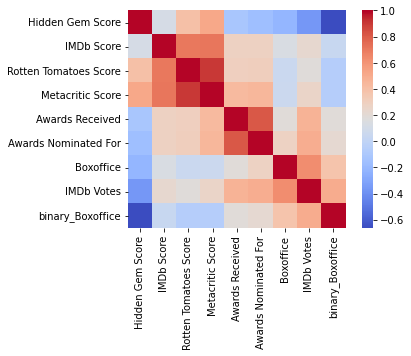

In [ ]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

Rotten Tomatoes Score  Metacritic Score         0.903345
Awards Received        Awards Nominated For     0.817262
IMDb Score             Metacritic Score         0.717715
                       Rotten Tomatoes Score    0.710922
Boxoffice              IMDb Votes               0.630301
Hidden Gem Score       Metacritic Score         0.521470
IMDb Votes             binary_Boxoffice         0.502759
dtype: float64

Существует корреляция между признаками, так как зачастую оценки критиков на разных порталах могут совпадать. Корреляция между остальными признаками также очевидна.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

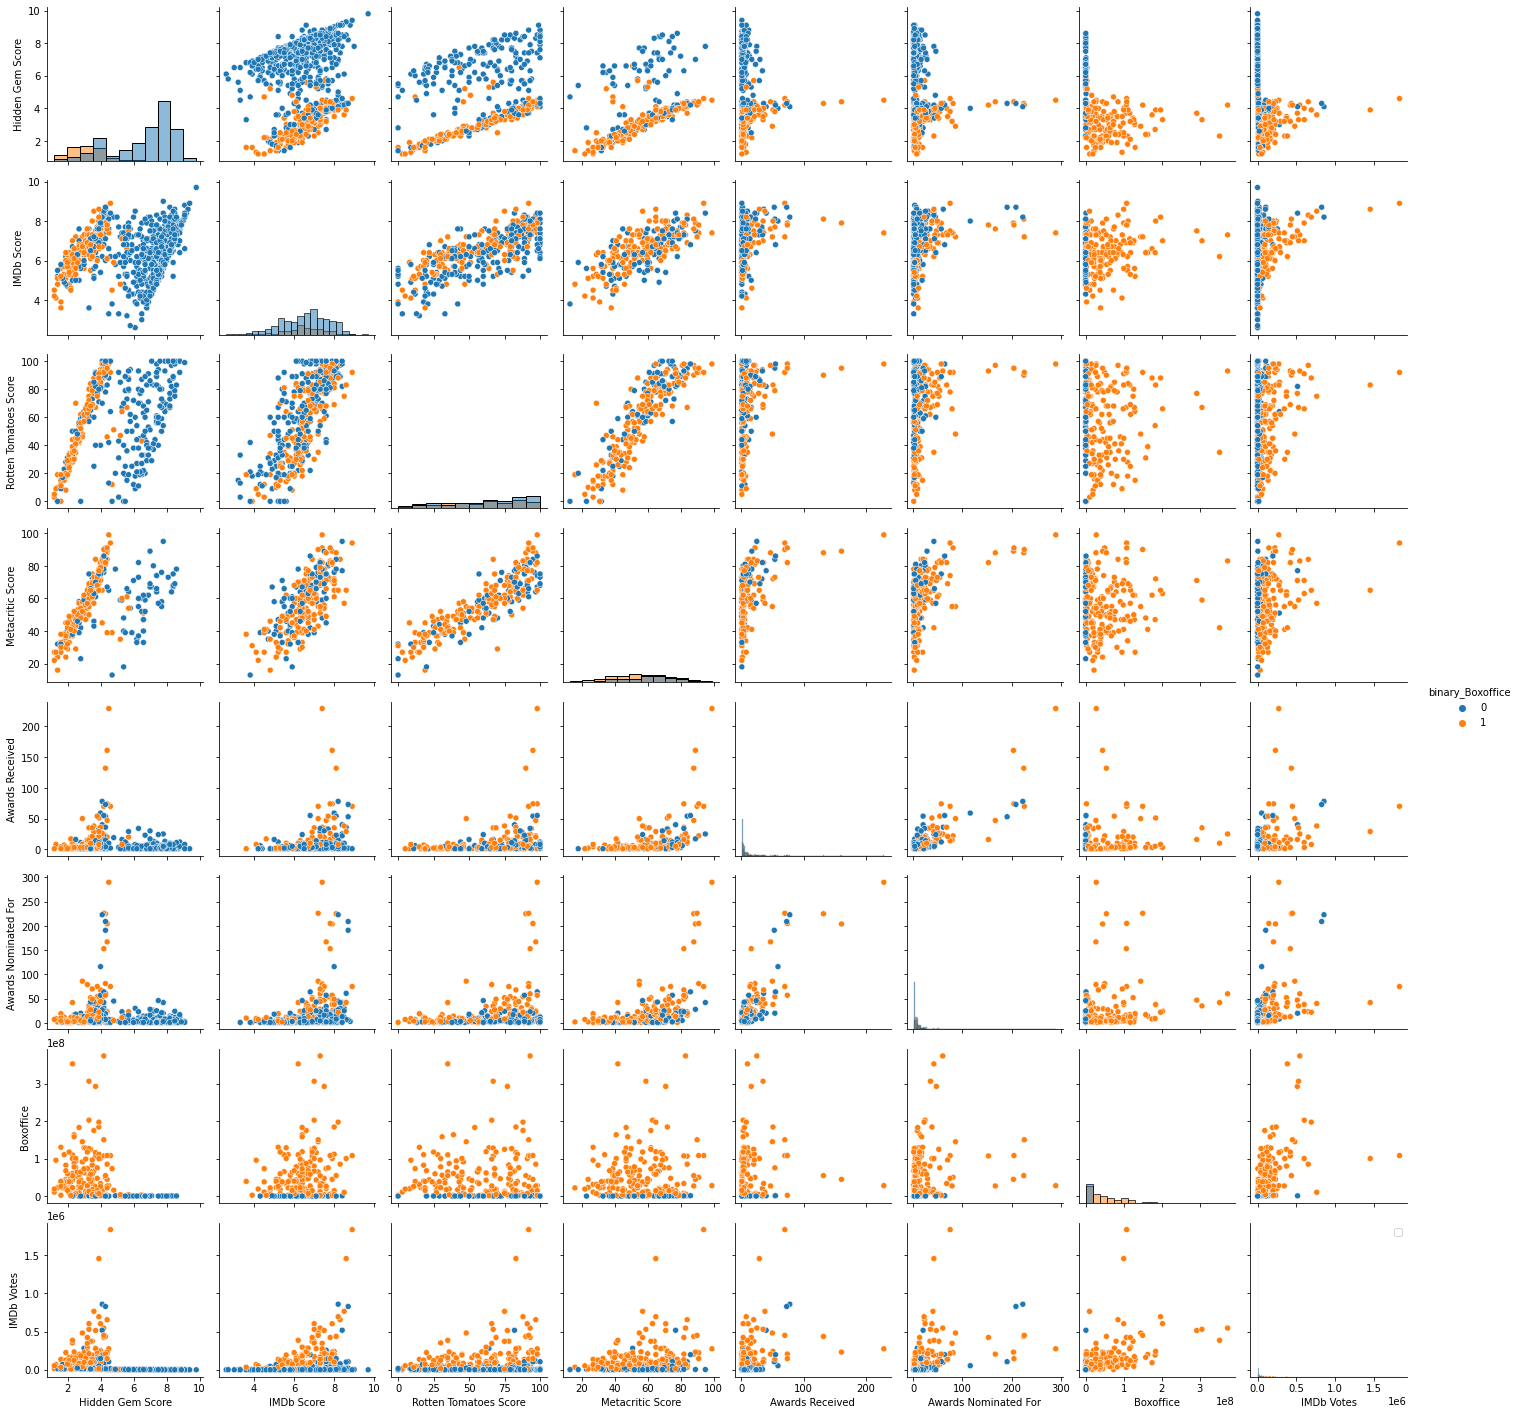

In [ ]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='binary_Boxoffice', diag_kind='hist')
plt.legend()
pass

##  3. Заполнение пропущенных значений 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [ ]:
data_raw.isna().sum()  

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                2101
binary_Boxoffice             0
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [ ]:
data_raw.fillna(data_raw.median(axis = 0, numeric_only=True), axis=0 , inplace=True)

In [ ]:
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score             0
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                   0
Rotten Tomatoes Score        0
Metacritic Score             0
Awards Received              0
Awards Nominated For         0
Boxoffice                    0
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                   0
binary_Boxoffice             0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [ ]:
data_raw['Genre'               ].fillna(data_raw['Genre'               ].mode().iloc[0], inplace=True)
data_raw['Tags'                ].fillna(data_raw['Tags'                ].mode().iloc[0], inplace=True)
data_raw['Languages'           ].fillna(data_raw['Languages'           ].mode().iloc[0], inplace=True)
data_raw['Country Availability'].fillna(data_raw['Country Availability'].mode().iloc[0], inplace=True)
data_raw['Runtime'             ].fillna(data_raw['Runtime'             ].mode().iloc[0], inplace=True)
data_raw['Director'            ].fillna(data_raw['Director'            ].mode().iloc[0], inplace=True)
data_raw['Writer'              ].fillna(data_raw['Writer'              ].mode().iloc[0], inplace=True)
data_raw['Actors'              ].fillna(data_raw['Actors'              ].mode().iloc[0], inplace=True)
data_raw['View Rating'         ].fillna(data_raw['View Rating'         ].mode().iloc[0], inplace=True)
data_raw['Release Date'        ].fillna(data_raw['Release Date'        ].mode().iloc[0], inplace=True)
data_raw['Production House'    ].fillna(data_raw['Production House'    ].mode().iloc[0], inplace=True)

In [ ]:
data_raw.isna().sum()

Title                    0
Genre                    0
Tags                     0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View Rating              0
IMDb Score               0
Rotten Tomatoes Score    0
Metacritic Score         0
Awards Received          0
Awards Nominated For     0
Boxoffice                0
Release Date             0
Netflix Release Date     0
Production House         0
IMDb Votes               0
binary_Boxoffice         0
dtype: int64

In [ ]:
data_raw.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,binary_Boxoffice
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,1.548000e+04,1.548000e+04,15480.000000
mean,6.054606,6.510149,62.154264,56.947804,5.262209,9.445736,2.631514e+07,3.724431e+04,0.191796
std,2.112675,1.066909,17.474509,9.305129,11.810821,21.453523,3.787825e+07,1.176760e+05,0.393726
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,7.200000e+01,5.000000e+00,0.000000
25%,4.000000,6.000000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,5.520000e+02,0.000000
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,2.322000e+03,0.000000
75%,7.800000,7.200000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,1.395125e+04,0.000000
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2.354197e+06,1.000000


In [ ]:
data_raw.describe(include=['category'])

,Series or Movie,Runtime
count,15480,15480
unique,2,4
top,Movie,1-2 hour
freq,11697,9122


## 4. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков. Скопируем нужные признаки в новую таблицу.

In [ ]:
data = data_raw.loc[:, ['Title', 'Series or Movie', 'Hidden Gem Score', 'Runtime', 'IMDb Score', 
                        'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For', 
                        'Boxoffice', 'Netflix Release Date', 'IMDb Votes', 'binary_Boxoffice']].copy()

Бинарный признак `'Series or Movie'` заменим на числовой.

In [ ]:
data['Series or Movie'] = pd.factorize(data['Series or Movie'])[0]

К небинарному признаку `'Building'` применим метод бинаризации с помощью функции `get_dummies`:

In [ ]:
Runtime_dummies = pd.get_dummies(data['Runtime'])
Runtime_dummies.head(7)

,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,0,1
6,0,0,1,0


Добавим эти dummy-столбцы к таблице и удалим столбец `'Runtime'`:

In [ ]:
data = pd.concat((data, Runtime_dummies), axis=1)
data = data.drop(['Runtime'], axis=1)

In [ ]:
data.head()

,Title,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,IMDb Votes,binary_Boxoffice,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs
0,Lets Fight Ghost,0,4.3,7.9,98.0,82.0,74.0,57.0,2122065.0,2021-03-04,205926.0,1,0,0,1,0
1,HOW TO BUILD A GIRL,1,7.0,5.8,79.0,69.0,1.0,5.0,70632.0,2021-03-04,2838.0,0,1,0,0,0
2,Centigrade,1,6.4,4.3,64.0,46.0,3.0,5.0,16263.0,2021-03-04,1720.0,0,1,0,0,0
3,ANNE+,0,7.7,6.5,64.0,57.0,1.0,5.0,19551067.0,2021-03-04,1147.0,0,0,0,1,0
4,Moxie,1,8.1,6.3,64.0,57.0,3.0,4.0,19551067.0,2021-03-04,63.0,0,1,0,0,0


## 5. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать. Выполним стандартизацию всех признаков, то есть линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

In [ ]:
data_stand = (data - data.mean(axis = 0, numeric_only=True))/data.std(axis = 0, numeric_only=True)
data_stand.describe()

,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs,Awards Nominated For,Awards Received,Boxoffice,Hidden Gem Score,IMDb Score,IMDb Votes,Metacritic Score,Rotten Tomatoes Score,Series or Movie,binary_Boxoffice
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,15480.000000,1.548000e+04,15480.000000,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,15480.000000
mean,1.138337e-16,-5.508083e-18,-1.468822e-17,3.672055e-17,0.000000,-2.203233e-17,0.000000,2.056351e-16,-9.547344e-17,1.468822e-17,-2.093072e-16,-1.982910e-16,4.957275e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-1.197763e+00,-1.484945e-01,-5.898643e-01,-3.882635e-01,-0.393676,-3.608732e-01,-0.694728,-2.581848e+00,-5.164589e+00,-3.164563e-01,-5.582706e+00,-3.556853e+00,-1.758349e+00,-0.487130
25%,-1.197763e+00,-1.484945e-01,-5.898643e-01,-3.882635e-01,-0.207226,-1.915370e-01,-0.178574,-9.725138e-01,-4.781555e-01,-3.118079e-01,5.609421e-03,1.056245e-01,5.686786e-01,-0.487130
50%,8.348361e-01,-1.484945e-01,-5.898643e-01,-3.882635e-01,-0.207226,-1.915370e-01,-0.178574,3.528200e-01,8.421655e-02,-2.967666e-01,5.609421e-03,1.056245e-01,5.686786e-01,-0.487130
75%,8.348361e-01,-1.484945e-01,1.695196e+00,-3.882635e-01,-0.207226,-1.915370e-01,-0.178574,8.261534e-01,6.465886e-01,-1.979423e-01,5.609421e-03,1.056245e-01,5.686786e-01,-0.487130
max,8.348361e-01,6.733823e+00,1.695196e+00,2.575404e+00,17.552094,2.495489e+01,16.712724,1.772820e+00,2.989806e+00,1.968925e+01,4.626717e+00,2.165768e+00,5.686786e-01,2.052707


## 6. Отбор признаков
Для предсказания кассовых сборов `'binary_Boxoffice'` будем использовать все входные признаки кроме
`'Netflix Release Date'`, `'Title'`, `'Boxoffice'`.

In [ ]:
data_stand.columns

Index(['1-2 hour', '30-60 mins', '< 30 minutes', '> 2 hrs',
       'Awards Nominated For', 'Awards Received', 'Boxoffice',
       'Hidden Gem Score', 'IMDb Score', 'IMDb Votes', 'Metacritic Score',
       'Netflix Release Date', 'Rotten Tomatoes Score', 'Series or Movie',
       'Title', 'binary_Boxoffice'],
      dtype='object')

In [ ]:
X = data_stand.drop(['Netflix Release Date', 'Title', 'Boxoffice', 'binary_Boxoffice'], axis=1)
y = data['binary_Boxoffice']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
N_train, N_test

(11610, 3870)

## 7. Классификатор ближайших соседей $k$NN

In [ ]:
from sklearn import metrics

Тренируем модель (метод `fit`). Используем модель на новых данных (метод `predict`).

In [ ]:
print(1 - metrics.accuracy_score(y_test, y_test_pred))
print(np.mean(y_test != y_test_pred))

0.06459948320413433
0.06459948320413436


In [ ]:
k_range = range(1, 30)
err_train = []
err_test = []
for k in k_range:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

Сравним ошибки на обучающей и тестовой выборках.

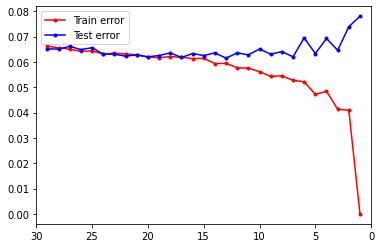

In [ ]:
plt.plot(k_range, err_train, '.-r', label = 'Train error')
plt.plot(k_range, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([30, 0])
pass

In [ ]:
print("err_test: {}".format(min(err_test)))
print("err_train: {}".format(err_train[k_range[err_test.index(min(err_test))]]))
print("best number of neighbors: {}".format(k_range[err_test.index(min(err_test))]))

err_test: 0.06149870801033592
err_train: 0.05934539190353144
best number of neighbors: 13


При малом количестве соседей точность на обучающей выборке выше, и при этом точность на тестовой выборке меньше, так как обучение из-за недостатка соседей было плохим. При увеличении соседей точность на обучающей выборке ухудшится (из-за большей вариативности), что прекрасно отражает график, но при этом алгоритм будет лучше натренирован, чтобы получить большую точность на тестовой выборке.

## 8. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("error_train : {:.16f}, error_test: {:.16f} ".format(err_train, err_test))

error_train : 0.0000861326442722, error_test: 0.0509043927648579 


У данного метода ошибка на обучающей выборке близка к нулю. На тестовой выборке ошибка меньше, чем у метода $k$NN.

## 9. Общие выводы

В ходе проделанной работы могу выделить плюсы и минусы метода $k$NN: 

**Достоинства**

* простота реализации
* устойчив к выбросам

**Недостатки**

* неэффективный расходу памяти, необходимость хранения всей выборки целиком
* медленный
* непонятно какое число соседей даст лучший результат и с какой метрикой

## 10. Подбор гиперпараметров

Посмотрим на число элментов в обучающей и тестовой выборках, разбитых в пункте 6 в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
N_train, N_test

(11610, 3870)

В качестве solver выберем наиболее эффективный алгоритм `Adam`. В качестве функции активации выберем `Relu` В качеcтве метрики оценки классификатора возьмем обычный `accuracy_score`, поскольку у нас 2 сбалансированных класса.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

#### 10.1 Подбор количества нейронов в однослойной сети


In [ ]:
hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', 
                          activation='relu', 
                          max_iter=1000, 
                          random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [04:51<00:00,  5.82s/it]


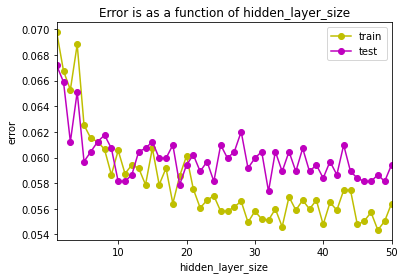

In [ ]:
plt.plot(hidden_layer_size, train_err, 'y-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'm-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()
pass

In [ ]:
print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: Min error=0.05434969853574505, number of neurons=48
Test: Min error=0.05736434108527132, number of neurons=32


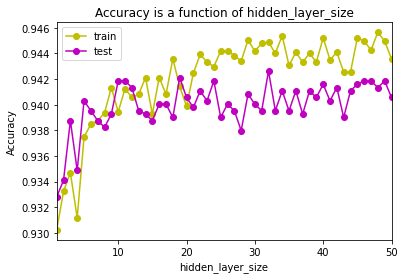

In [ ]:
plt.plot(hidden_layer_size, train_acc, 'y-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'm-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()
pass

In [ ]:
print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

Train: max accuracy=0.945650301464255, number of neurons=48
Test: max accuracy=0.9426356589147287, number of neurons=32


#### 10.2 Подбор количества нейронов в двуслойной сети

In [ ]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', 
                              activation='relu', 
                              max_iter=1000, 
                              random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)
        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [17:10, 103.08s/it]


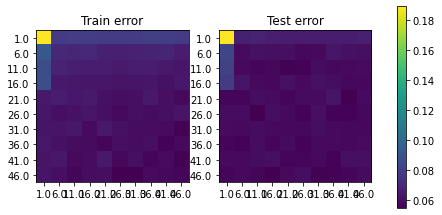

In [ ]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

In [ ]:
print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: error={0}, number of neurons={1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("Train: error={0}, number of neurons={1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Train: Min error=0.04547803617571059, number of neurons=45,30
Test: error=0.05607235142118863, number of neurons=45,30

Test: Min error=0.05503875968992248, number of neurons=45,15
Train: error=0.050301464254952626, number of neurons=45,15



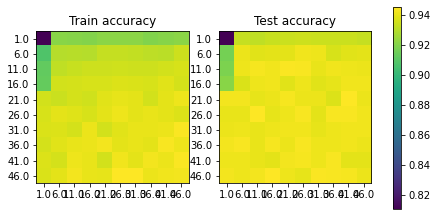

In [ ]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

In [ ]:
print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: accuracy={0}, number of neurons={1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("Train: accuracy={0}, number of neurons={1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

Train: Max accuracy=0.9545219638242894, number of neurons=45,30
Test: accuracy=0.9439276485788114, number of neurons=45,30

Test: Max accuracy=0.9449612403100776, number of neurons=45,15
Train: accuracy=0.9496985357450474, number of neurons=45,15



#### 10.3 Подбор параметра регуляризации
Лучшие показатели подемонстрировала сеть из 2-ух слоев (точность на тестовой и обучающей выборке у неё выше). Самая оптимальная точность достигается при количесте нейронов (45, 30). Будем подбирать параметр `alpha` для сети из 2-ух слоёв.

In [ ]:
alpha_arr = np.logspace(-3, 2, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha=alpha, 
                              hidden_layer_sizes=(45, 15),
                              solver='adam', 
                              activation='relu', 
                              max_iter=1000, 
                              random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [05:17<00:00,  6.34s/it]


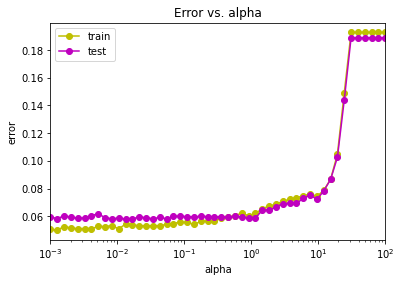

In [ ]:
plt.semilogx(alpha_arr, train_err, 'y-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'm-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

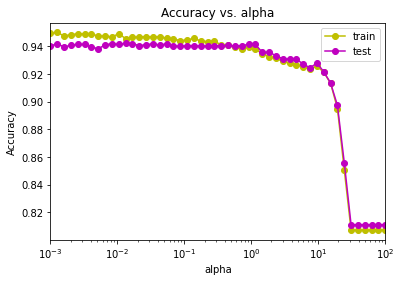

In [ ]:
plt.semilogx(alpha_arr, train_acc, 'y-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'm-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

Из графиков видно, что при небольших значениях параметра регуляризации (когда `alpha` < 10), наблюдается высокая точность, но при `alpha` > 10 происходит резкое понижение точности, то есть наблюдается недообучение.
Также из графиков 1 и 2 теста заметно, что результаты тестовой выборки приближены к результатам тренировочной, но всё-таки можно выделить оптимальное значение `alpha` = [0, 1].
В таком случае точность и на тестовой, и на обучающей выборке почти совпадает, и самое главное, что точность остаётся хоть и не на максимальном уровне (как при очень маленьких `alpha`), но всё также на очень высоком.

Возьмём в качестве значения `alpha` то значение `alpha`, при котором минимальна ошибка на тесте.

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.04995693367786391 0.05788113695090439


In [ ]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)
alpha_opt = alpha_opt[0]
print("Alpha opt:", alpha_opt)

[0.01325711]
Alpha opt: 0.013257113655901095


#### 10.4 Классификатор при найденном оптимальном значении параметра `alpha`
Повторим обучение:

In [ ]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(20,),
                          solver='adam', activation='relu', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

#### 10.5 Матрица рассогласования

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(confusion_matrix(y_test_pred, y_test))

[[3028  121]
 [ 111  610]]


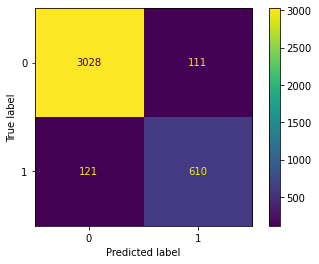

In [ ]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=mlp_model.classes_)
disp.plot()
plt.show()

## 11. Выводы
#### 11.1 Подбор числа нейронов в однослойной модели
Графики `Error` и `Accuracy` для `train` и `test` почти зеркальны, что говорит об почти одинаковом распределении тренировочных и тестовых данных.
Наблюдается переобучение. Результаты точности тренировной выборки оказались выше меньше половины процента, чем у тестовой. Это говорит об умении модели обучаться.
За оптимальный размер скрытого слоя возьмём минимум ошибки и максимум точности на тестовой выборке 94.2% - 32 нейрона.
#### 11.2 Подбор числа нейронов в двуслойной модели
Наблюдается недообучение тренировочной выборки на 1%, по сравнению с тестовой (это видно из графиков, на `error` преобладает синий цвет, в то время как на `accuracy` жёлтый). При количестве нейровнов в слое больше 2 уже достигается точность выше 94.9% -- 45 нейронов на первом и 15 на нейронов на втором слоях. Возьмём два слоя сети и это число нейронов как оптимальные размеры скрытых слоёв.
#### 11.3 Подбор параметра регуляризации
Как уже было замечено выше, с ростом коэффициента регуляризации растёт ошибка и соответственно снижается точность. Это говорит о том, что после обучения у модели не возникает больших значений весовых коэффициентов, а значит нет переобучения. При `alpha` > 10 начинается рост ошибки и снижение точности, то есть с ростом `alpha` веса модели уменьшаются и стремятся к нулю.